In [1]:
import numpy as np 
import pandas as pd 
import os 
from scipy.stats.mstats import gmean
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_excel('Scored_variables.xlsx')
data

,fips,pct_laccess_hhnv,center,geometry,fips_prefix,retail_density_index,food_insecurity_rate,below_poverty_level_percent_civilian_labor_force_16_years_and_over,ed_attain,food_banks,food_desert_1and10,ffrpth,convspth,SNAP Inequality,LAccess Inequality,Poverty Inequality,Age Poverty Inequality
0,1001,0.033513,POINT (-86.487813 32.500194),"POLYGON ((-86.921196 32.657542, -86.920352 32....",1,0.128134,0.157,0.072,0.282,0,0.80,0.556800,0.640696,0.451,0.768526,-4777,-540
1,1003,0.019051,POINT (-87.761478 30.537396),"POLYGON ((-88.02857999999999 30.226763, -88.02...",1,0.171615,0.134,0.053,0.337,0,0.75,0.570850,0.637491,0.285,0.860267,-14502,-716
2,1005,0.043294,POINT (-85.301306 31.843981),"POLYGON ((-85.748032 31.619180999999998, -85.7...",1,0.198475,0.207,0.134,0.144,0,0.75,0.528437,0.575647,0.344,0.897265,-4019,-443
3,1007,0.028214,POINT (-87.136826 33.032236),"POLYGON ((-87.421936 33.003378999999995, -87.3...",1,0.182554,0.163,0.064,0.131,0,1.00,0.763777,0.601414,0.500,0.976412,-2274,-329
4,1009,0.033364,POINT (-86.592667 33.954604),"POLYGON ((-86.963358 33.858221, -86.959667 33....",1,0.112796,0.145,0.052,0.136,0,1.00,0.714506,0.680708,0.059,0.940927,-7372,-431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,56037,0.021828,POINT (-109.302521 41.580564),"POLYGON ((-110.054384 42.01103, -110.054363 42...",56,0.124511,0.113,0.079,0.219,0,1.00,0.588012,0.667899,0.221,0.616873,-4454,-445
3040,56039,0.005402,POINT (-110.785815 43.491744),"POLYGON ((-111.053610326574 44.6662669770011, ...",56,0.322541,0.090,0.066,0.762,0,1.00,0.536823,0.549550,0.000,0.735139,-1263,-525
3041,56041,0.027599,POINT (-110.760395 41.271502),"POLYGON ((-111.046615849252 41.15604186297939,...",56,0.170996,0.126,0.063,0.188,0,1.00,0.549203,0.614369,0.069,0.798591,-1480,-81
3042,56043,0.012036,POINT (-107.905059 44.012223),"POLYGON ((-108.550562 44.168454999999994, -108...",56,0.120145,0.116,0.096,0.301,0,1.00,0.577107,0.731856,0.028,0.896417,-680,-109


In [3]:
subdata = data.iloc[:, 5:]
subdata

,retail_density_index,food_insecurity_rate,below_poverty_level_percent_civilian_labor_force_16_years_and_over,ed_attain,food_banks,food_desert_1and10,ffrpth,convspth,SNAP Inequality,LAccess Inequality,Poverty Inequality,Age Poverty Inequality
0,0.128134,0.157,0.072,0.282,0,0.80,0.556800,0.640696,0.451,0.768526,-4777,-540
1,0.171615,0.134,0.053,0.337,0,0.75,0.570850,0.637491,0.285,0.860267,-14502,-716
2,0.198475,0.207,0.134,0.144,0,0.75,0.528437,0.575647,0.344,0.897265,-4019,-443
3,0.182554,0.163,0.064,0.131,0,1.00,0.763777,0.601414,0.500,0.976412,-2274,-329
4,0.112796,0.145,0.052,0.136,0,1.00,0.714506,0.680708,0.059,0.940927,-7372,-431
...,...,...,...,...,...,...,...,...,...,...,...,...
3039,0.124511,0.113,0.079,0.219,0,1.00,0.588012,0.667899,0.221,0.616873,-4454,-445
3040,0.322541,0.090,0.066,0.762,0,1.00,0.536823,0.549550,0.000,0.735139,-1263,-525
3041,0.170996,0.126,0.063,0.188,0,1.00,0.549203,0.614369,0.069,0.798591,-1480,-81
3042,0.120145,0.116,0.096,0.301,0,1.00,0.577107,0.731856,0.028,0.896417,-680,-109


In [4]:
#calculate the correlation matrix 
correlation_matrix=subdata.corr()

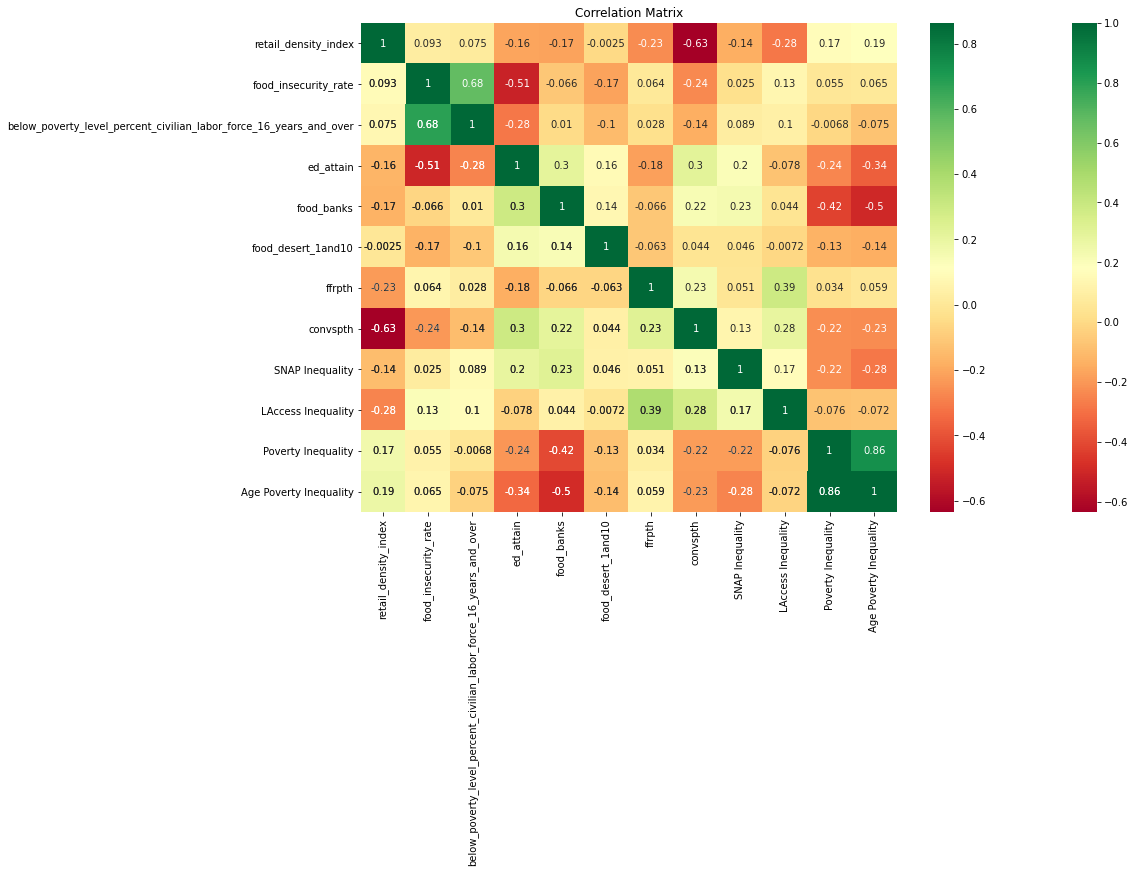

In [5]:
#plot the correlation matrix
plt.figure(figsize=(15, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')
#Highlight positive correlations
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', mask=mask)

plt.show()